In [1]:
import  pandas as pd
import numpy as np
import scaleogram as scg
import matplotlib.pyplot as plt
import pywt

In [2]:
from savgol import savitzky_golay

In [3]:
def Phase( t, p):
    phase = []    
    phase = (t/(p))- np.fix(t/(p))
    return (phase)


def T_0_fixer(T0,t,p, phase):
    phase0 = (T0/(p))- np.fix(T0/(p))
    phase = phase - phase0 - (0.25)
    for i in np.arange(len(phase)):
        if phase[i]<0:
            phase[i]=phase[i]+1
        if phase[i]>1:
            phase[i]=phase[i]-1
    return (phase)


def JDfixer(t):
    if t[0]>10000:
        t = t - 2450000
    return (t)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [5]:
# Read in KELT data
# Period = 4.736529

data = np.loadtxt('./../data/KELT_N19_lc_007589_V01_comb_raw.dat')
df = pd.DataFrame({'t':data[:,0], 'm':data[:,1], 'e':data[:,2]})

df1 = pd.read_excel('lc/KELT-11b.xlsx')

In [10]:
# Read in ASASSN (df1) and OGLE (df2)
# Period = 0.516283

# df1 = pd.read_csv('OGLE-LMC-RRLYR-00854/ASASSN-V J044620.28-682529.9.csv', usecols=[0,3,4],skiprows=1, names=['t','m','e'])
# df2 = pd.read_table('OGLE-LMC-RRLYR-00854/OGLE-LMC-RRLYR-00854.dat',delimiter=' ', names=['t','m','e'])

In [11]:
# Read in K2 data
# Period = 1.677689


# df1 = pd.read_csv('lc/k2_eb.csv',skiprows=1, names=['t','m'])
# df1.m = -2.5*np.log10(df1.m/df1.m[0])
# median = np.median(df['m'])
# df['m'] = df['m']- median

In [12]:
# Read in TESS data 

# 266656195 is a Be star from Jon's paper: https://arxiv.org/pdf/2010.13905.pdf
# 55092869 is TIC ID for KELT-11b --> Period = 4.736529

df2 = pd.read_csv('lc/55092869.csv')
df2['m'] = -2.5*np.log10(df2['Flux']/df2['Flux'][0])
# Removing the large-scale signal:
# df['m'] = df.m-savitzky_golay(df.m.values, 1711,3)

# df['m'] = -2.5*np.log10(f/f[0])
# median = np.median(df['m'])
# df['m'] = df['m']- median

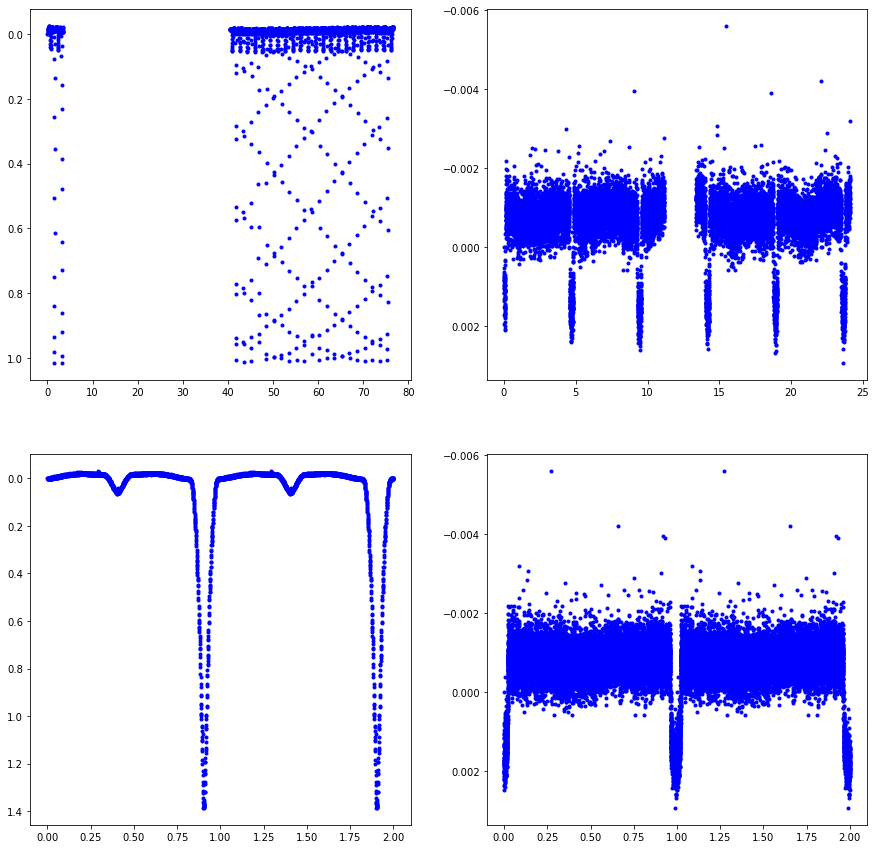

In [20]:
# Plotting full and phased light curves



p = 1.677689#4.736529#0.516283
p2 = 4.736529#0.5162796

fig, axs = plt.subplots(2,2,figsize=(15,15))
axs[0,0].plot(df1.t-min(df1.t), savitzky_golay(df1.m.values,11,3),'b.')
axs[0,1].plot(df2.t-min(df2.t), df2.m,'b.')

axs[1,0].plot(((df1.t-min(df1.t))/p) - np.fix((df1.t-min(df1.t))/p), df1.m,'b.',\
             ((df1.t-min(df1.t))/p) - np.fix((df1.t-min(df1.t))/p)+1, df1.m,'b.')
axs[1,1].plot(((df2.t-min(df2.t))/p2)-np.fix((df2.t-min(df2.t))/p2), df2.m,'b.',\
             ((df2.t-min(df2.t))/p2)-np.fix((df2.t-min(df2.t))/p2)+1, df2.m,'b.')

axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
axs[1,0].invert_yaxis()
axs[1,1].invert_yaxis()

0.040863306609935535
0.002777750559289416


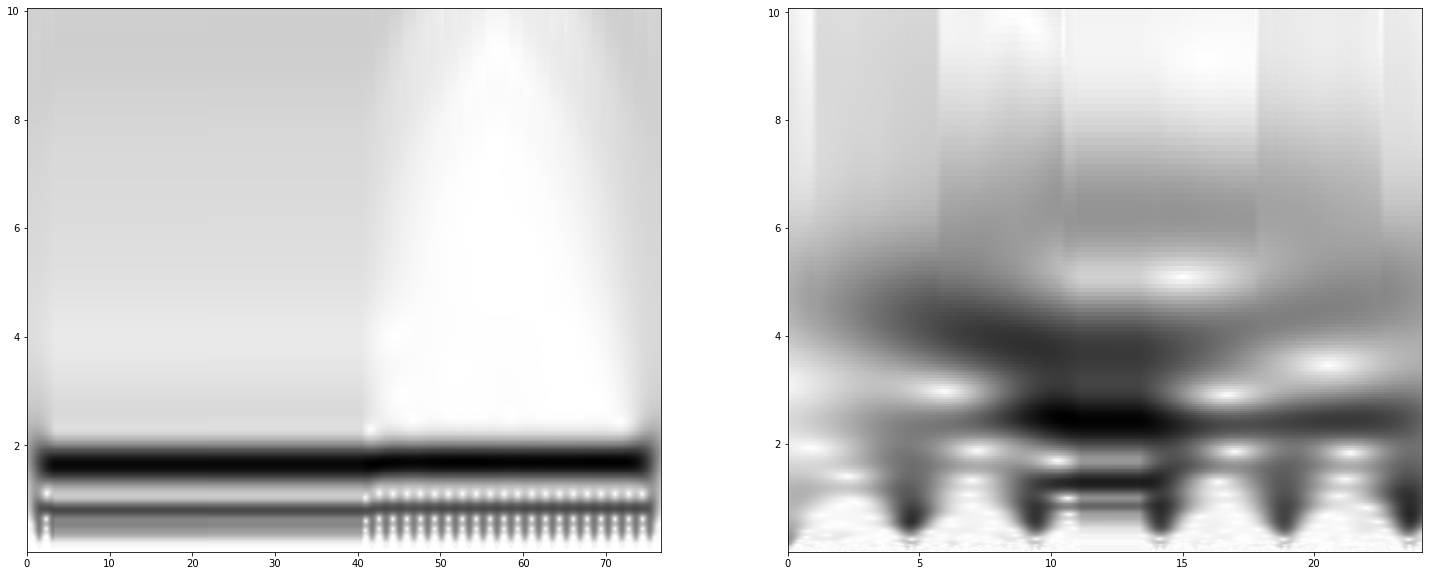

In [21]:
from scipy import signal
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(25,10))


# t, dt = np.linspace(0, 1, 400, retstep=True)
t = df1.t.values - df1.t.values[0]
dt = np.median(np.diff(df1.t.values))

nyquist = 0.5 * (1./dt)


minimum_period = 1/nyquist
print(minimum_period)
maximum_period = 10#t[-1]
period = np.geomspace(minimum_period, maximum_period, 512)

w = 6

widths = w * nyquist * period / np.pi
sig = smooth(df1.m.values- np.median(df1.m.values),10)
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
power = np.abs(cwtm)#np.abs(cwtm)**2 / widths[:, np.newaxis]


# print(dt)
# fs = 1./dt
# print(fs)
# w = 1.
# sig = df1.m.values #- np.median(df1.m.values) #np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)
# freq = np.linspace(1, 5, 100)
# widths = w*fs / (2*freq*np.pi)
# # print(widths)
# cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
# power = np.abs(cwtm)**2 / widths[:, np.newaxis]
cc = axs[0].pcolormesh(t, period, power, shading='auto', 
                cmap='binary')
# fig.colorbar(cc)
# axs[0].set_yscale('log')


t = df2.t.values - df2.t.values[0]
# dt = np.median(np.diff(df2.t.values))
# # print(dt)
# fs = 1./dt
# # print(/fs)
# w = 1.
# sig = df2.m.values#- np.median(df2.m.values) #np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)
# freq = np.linspace(1, 5, 100)
# widths = w*fs / (2*freq*np.pi)
# # print(widths)
# cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
# power = np.abs(cwtm)**2 / widths[:, np.newaxis]

nyquist = 0.5 * (1./(np.median(np.diff(df2.t.values))))


minimum_period = 1/nyquist
print(minimum_period)
maximum_period = 10#t[-1]
period = np.geomspace(minimum_period, maximum_period, 512)

w = 6

widths = w * nyquist * period / np.pi
cwtm = signal.cwt(df2.m.values- np.median(df2.m.values), signal.morlet2, widths, w=w)
power = np.abs(cwtm)#np.abs(cwtm)**2 / widths[:, np.newaxis]


cc = axs[1].pcolormesh(t, period, power, shading='auto', 
                cmap='binary')
# fig.colorbar(cc)
# axs[1].set_yscale('log')
# plt.show()

In [23]:
# data = smooth(df.m, 10).squeeze()
# data = savitzky_golay(df.m.values,11,4).squeeze()
data = df.m.values.squeeze()
# data = df.y.values.squeeze()
# data = df.Flux-savitzky_golay(df.Flux.values, 1711,3)#df.Flux.values.squeeze()

N = data.size; print("Nb of samples of data:", N)
# t0 = 0; dt = 1
# year = t0 + np.arange(len(data))*dt
# time = df.x.values
# time = df.Time.values
time = df.t.values



Nb of samples of data: 15714


In [192]:
# scales=np.arange(1,50,1)
# freq = pywt.scale2frequency(wavelet,scales)
# 1./freq
# # >>> widths = np.arange(1, 31)
# cwtmatr, freqs = pywt.cwt(data, scales,wavelet=wavelet)
# plt.imshow(cwtmatr, aspect='auto',
#            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP


In [226]:
data1 = savitzky_golay(df1.m.values, 151, 3).squeeze()
N1 = data1.size; print("Nb of samples of data:", N1)
time1 = df1.t.values

data2 = df2.m.values.squeeze()
N2 = data2.size; print("Nb of samples of data:", N2)
time2 = df2.t.values

Nb of samples of data: 3910
Nb of samples of data: 15714


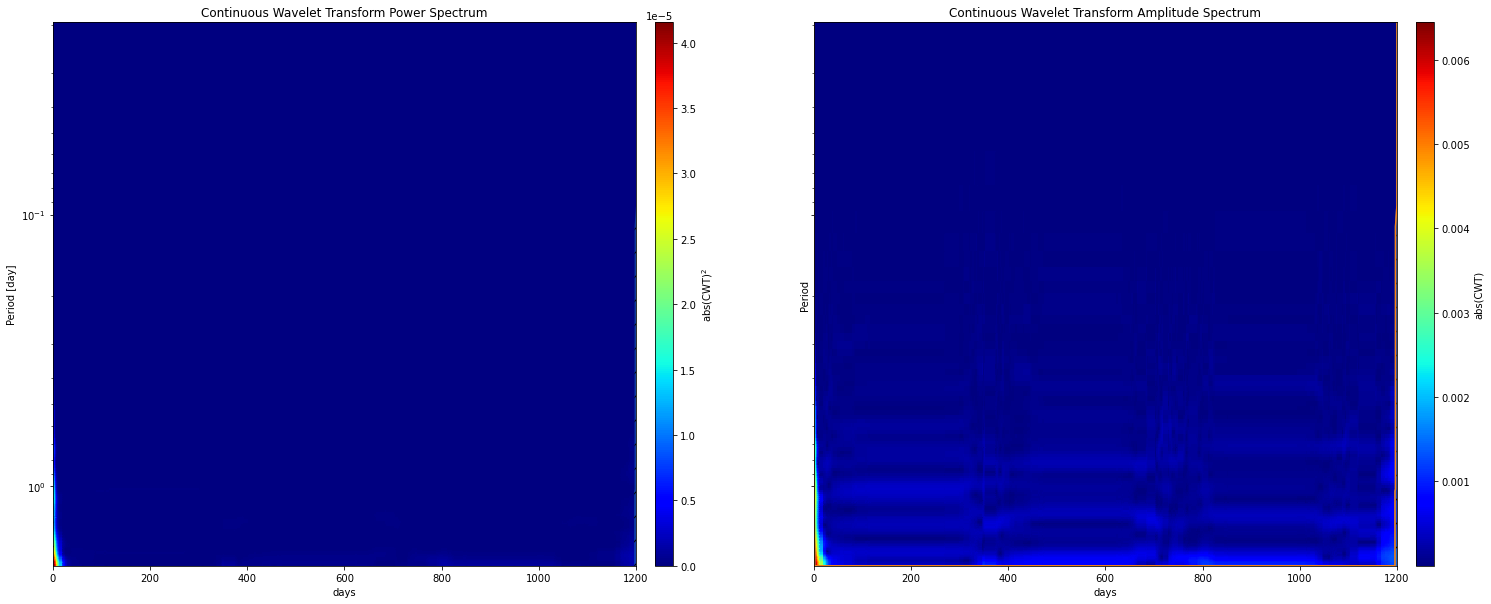

In [227]:
# scales = np.logspace(0.1, 1.3, num=200, dtype=np.int32)
# scales=np.linspace(1,100)
# wavelet='cmor5-1.5'

fig, axs = plt.subplots(1,2, figsize=(25,10), sharey=True)
ax = scg.cws(time1 - min(time1), data1, wavelet=wavelet,spectrum='power',\
             ylabel="Period [day]", xlabel='days', ax=axs[0], yscale = 'log')#clim= (1e-6,5e-3))
ax1 = scg.cws(time1 - min(time1), data1, wavelet=wavelet, yscale = 'log',\
              xlabel='days', ax=axs[1])#,clim= (1e-3,5e-2), scales=scales,
# ax.set_ylim(0.1,0.5)

array([   0,    1,    2, ..., 3907, 3908, 3909])

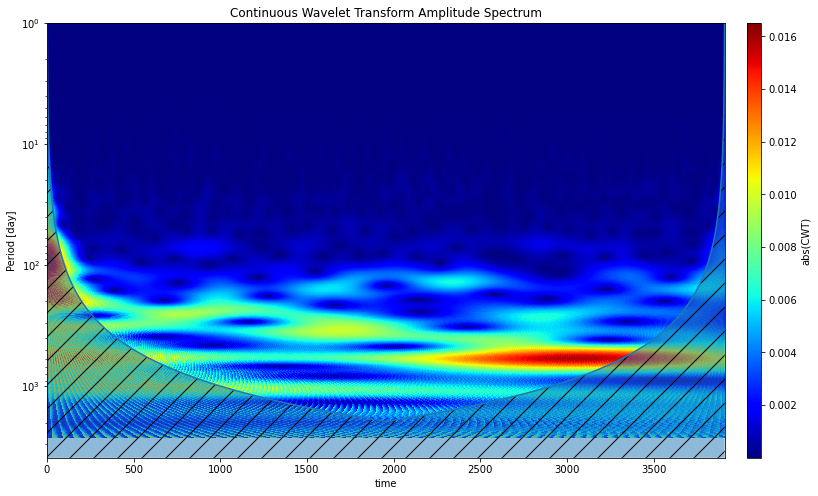

In [269]:
df1.t = df1.t-df1.t[0]
# df1.m = savitzky_golay(df1.m.values, 151, 3)
df1['m_savgol'] = savitzky_golay(df1.m.values, 151, 3)
df1['m_smoothed'] = smooth(df1.m, 10)
data1 = df1[['t', 'm_smoothed']].groupby('t').sum().squeeze()

# scales = scg.periods2scales(np.arange(1,5,0.1), dt= 0.01)#, dt = np.median(np.diff(df1.t.values)))

scales = scg.periods2scales( np.arange(1, len(df1.t)+1) )
x_values = df1.index.values#range(0,len(df1.t),1)

data1_normed = data1#-data1.median()
ax = scg.cws(x_values, df1.m_savgol, figsize=(13.2, 8),yaxis='period', xlabel="time",\
             scales=scales, ylabel="Period [day]", yscale='log')
# set_x_yearly(ax, len(births))

In [18]:
scg.cws?

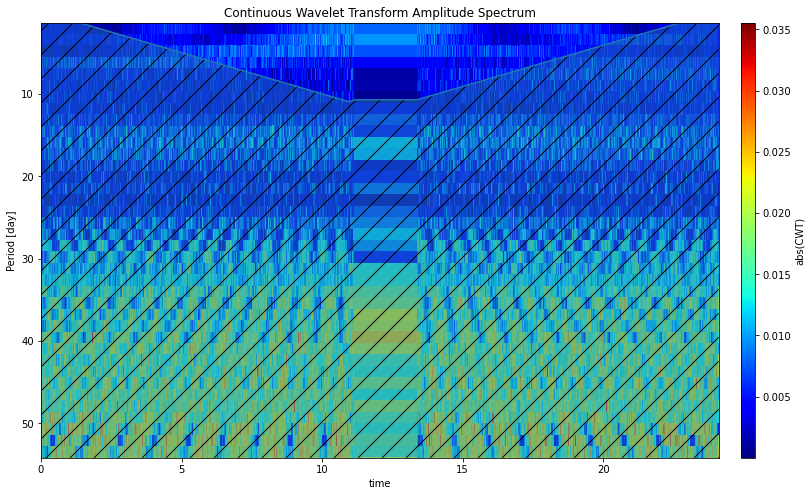

In [254]:
df2.t = df2.t-df2.t[0]
# df1.m = savitzky_golay(df1.m.values, 151, 3)
# df1['m_savgol'] = savitzky_golay(df1.m.values, 151, 3)
# df1['m_smoothed'] = smooth(df1.m, 10)
data1 = df2[['t', 'm']].groupby('t').sum().squeeze()

scales = scg.periods2scales(np.arange(1,40,1), dt=0.001)#, dt = np.median(np.diff(df1.t.values)))

data1_normed = data1#-data1.median()
ax = scg.cws(df2.t.values, data1_normed, figsize=(13.2, 8),yaxis='period', xlabel="time",\
             scales=scales, ylabel="Period [day]")
# set_x_yearly(ax, len(births))

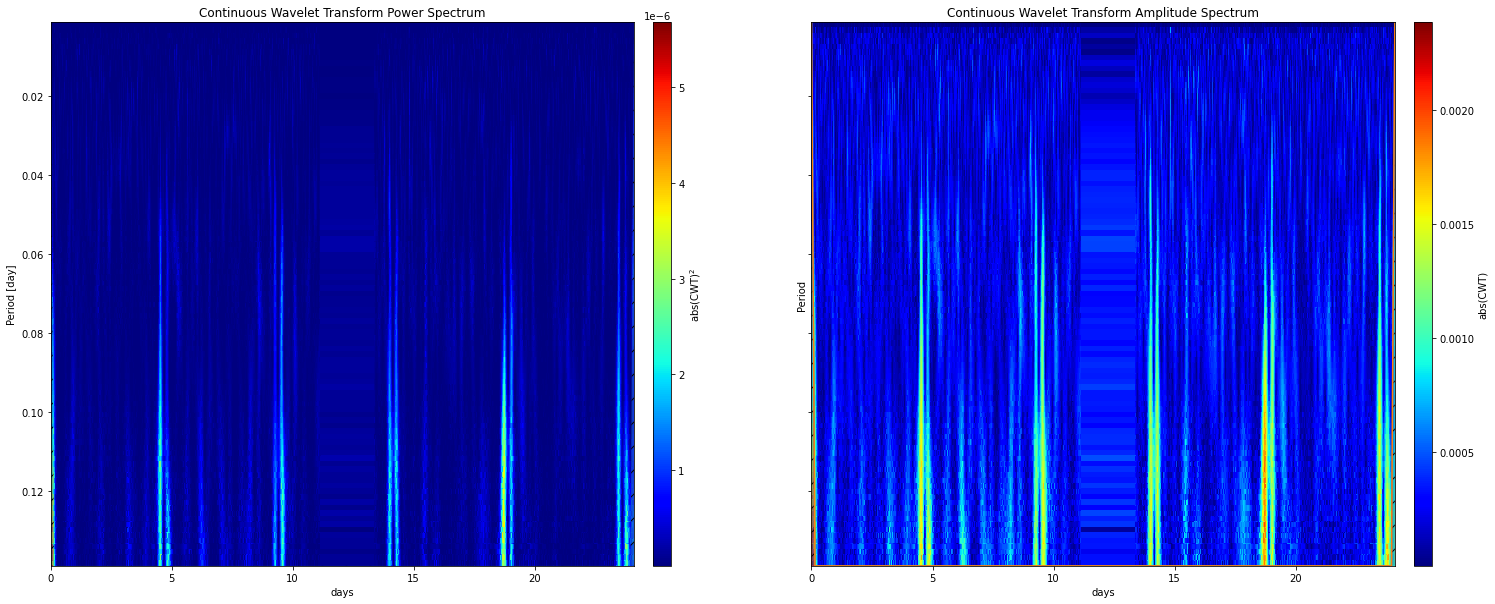

In [215]:
# scales = np.logspace(0.1, 1.3, num=200, dtype=np.int32)
scales=np.linspace(0.01,10,100)
wavelet='cmor1.5-1'

periods = np.linspace(0.01,10,100)

fig, axs = plt.subplots(1,2, figsize=(25,10), sharey=True)
ax = scg.cws(time2 - min(time2), data2, wavelet=wavelet,spectrum='power',\
             ylabel="Period [day]", xlabel='days', ax=axs[0])#clim= (1e-6,5e-3))
ax1 = scg.cws(time2 - min(time2), data2, wavelet=wavelet,\
              xlabel='days', ax=axs[1])#,clim= (1e-3,5e-2), scales=scales,
# ax.set_ylim(0.1,0.52

Nb of samples of data: 3910


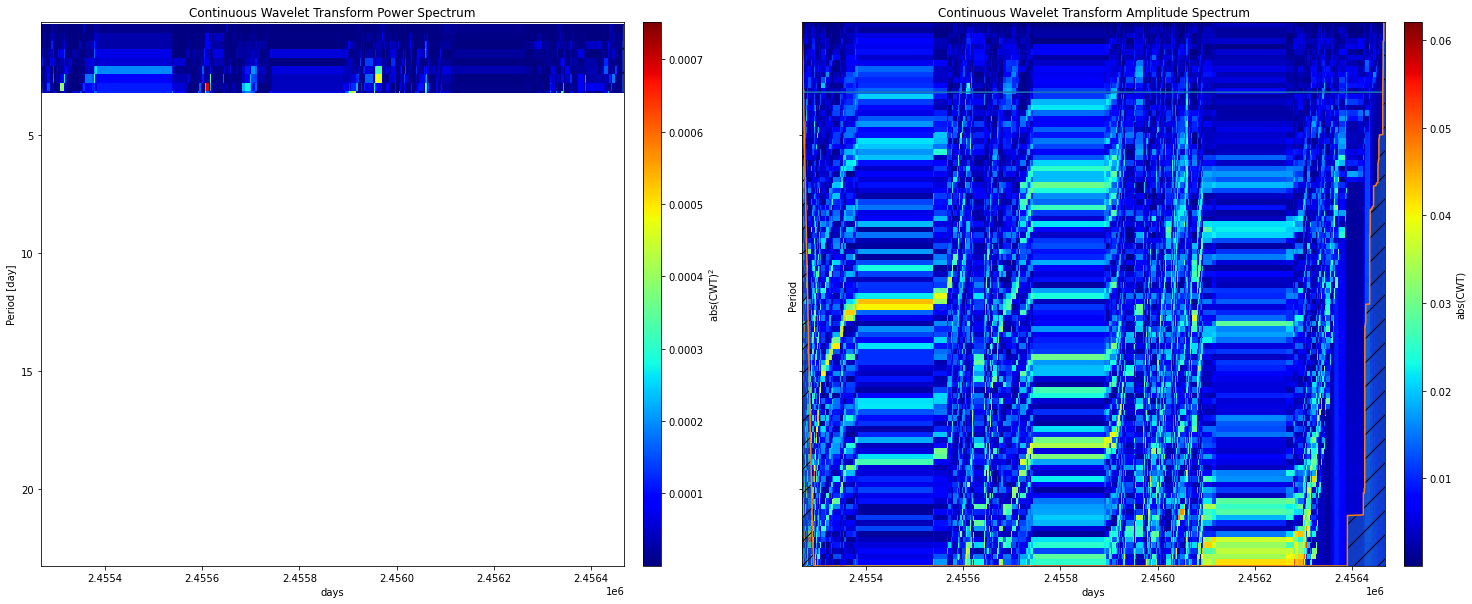

In [110]:
data = smooth(df_kelt.m,15).squeeze()
# data = savitzky_golay(df_kelt.m.values,11,4).squeeze()
# data = df_kelt.m.values.squeeze()
# data = df.y.values.squeeze()
# data = df.Flux-savitzky_golay(df.Flux.values, 1711,3)#df.Flux.values.squeeze()

N = data.size; print("Nb of samples of data:", N)
# t0 = 0; dt = 1
# year = t0 + np.arange(len(data))*dt
# time = df.x.values
# time = df.Time.values
time = df_kelt.t.values# - min(df_kelt.t.values) 



# scales = np.logspace(0.1, 1.3, num=200, dtype=np.int32)
scales=np.arange(1,10)*1.5
wavelet='cmor1-0.1'

fig, axs = plt.subplots(1,2, figsize=(25,10), sharey=True)
ax = scg.cws(time, data, wavelet=wavelet, yaxis='period',spectrum='power',scales=scales,\
             ylabel="Period [day]", xlabel='days', ax=axs[0])#clim= (1e-6,5e-3))
ax1 = scg.cws(time, data, wavelet=wavelet, yaxis='period',\
              xlabel='days', ax=axs[1])#,clim= (1e-3,5e-2), scales=scales,
# ax.set_ylim(0.1,0.5)

Nb of samples of data: 15714


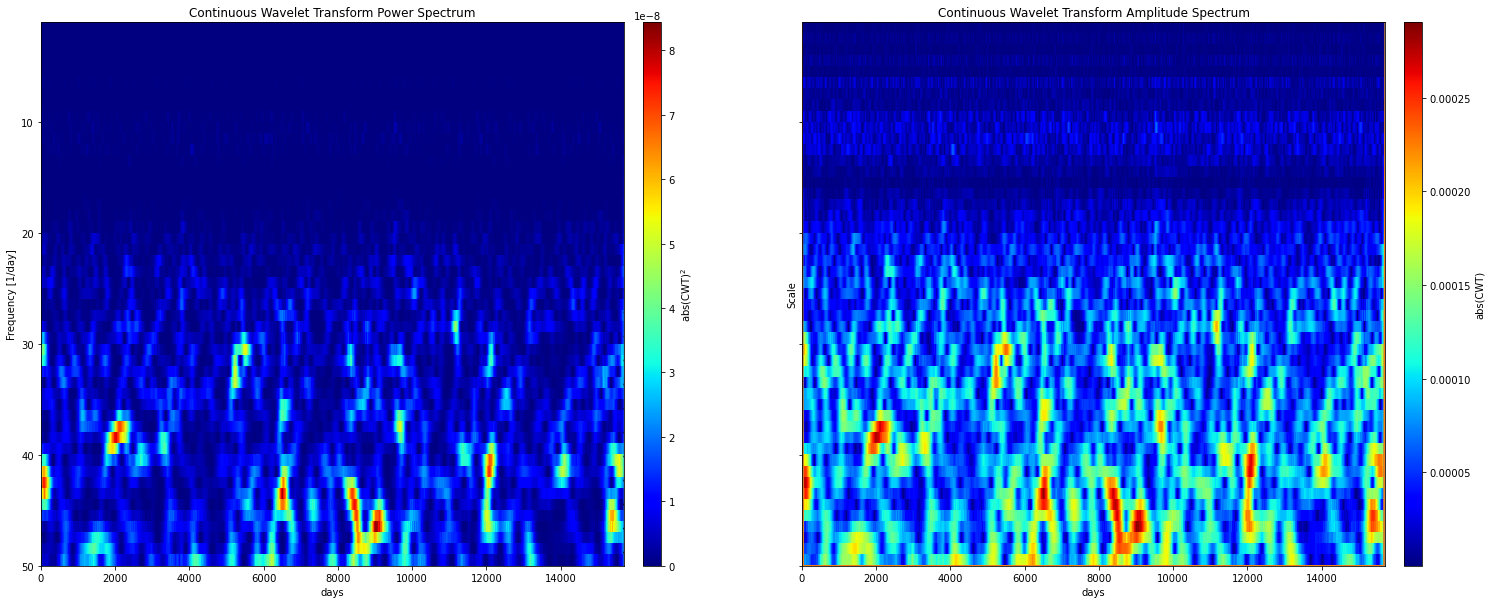

In [62]:
data = smooth(df.m, 10).squeeze()
# data = savitzky_golay(df.m.values,11,4).squeeze()
# data = df.m.values.squeeze()
# data = df.y.values.squeeze()
# data = df.Flux-savitzky_golay(df.Flux.values, 1711,3)#df.Flux.values.squeeze()

N = data.size; print("Nb of samples of data:", N)
# t0 = 0; dt = 1
# year = t0 + np.arange(len(data))*dt
# time = df.x.values
# time = df.Time.values
time = df.index.values

import scaleogram as scg
# scales = np.linspace(0.05, 1, num=200, dtype=np.int32)
scales=np.arange(1,50,1)
wavelet='cmor19-1.5'

fig, axs = plt.subplots(1,2, figsize=(25,10), sharey=True)
ax = scg.cws(time, data, wavelet=wavelet, yaxis='scale',spectrum='power',scales=scales,\
             ylabel="Frequency [1/day]", xlabel='days', ax=axs[0])
ax1 = scg.cws(time, data, wavelet=wavelet, yaxis='scale',scales=scales,\
              xlabel='days', ax=axs[1])
# ax.set_ylim(0.1, 0.5)